In [1]:
import pandas as pd

## Introduction

### Authors
##### The Authors are Graham-George and Jean-Henri-Fabre.
### Reason
##### The reason for selecting their work are :
   ##### The correlation would be strong because the jean books are about the life of the different insects ,the graham work is a sequel and all the books have the word counts of more than 50,000
### Data Cleaning:
 ##### 1.data_clean.py removes the header and footer of the book
   ##### data_clean.py returns the content of the book. 
 ##### 2.In fileConvert.py ,the dictionary lambdaSlice performs the data trimming based on the lambda functions and regular expression which is defined as key in the lambda.
 ##### 3.All the words are converted to the lower case.
### Source:
  ##### All these books are collected from the site provided in the course site.(project Gutenberg)
### Tools used for transforming the data to csv:
  ##### Plain Python . Files name:fileConvert.py,data_clean.py every iteration steps
  ##### In fileConvert.py - there are several steps which is performed to covert the file to csv
  ##### 1.First the raw text file of book is send to the function called funcDataClean in data_clean.py which return the text file with no header and footer only the content of the book.
  ##### 2.Then the content of the book text is send to the function called count in fileconvert.py which trims the data using lambda function and regular expression defined in the lambdaSlice dict.Words will be converted to the lower.Then the words and its counts are stored in the dictvl dictionary. 
  ##### 3.The count function returns the dictvl(dict with word counts) and sum of the counts which will then send to the create_csv which calculates the frequency of the words using the sum of the words and count of the particular words as well as words and write it in the csv. Data cleaning is done in this function as well . the average is calculated , only the words which has the count value of  more than the average value is written to the file 
  ##### note:The sum is calculated in respect to all the words from count function before so the frequency value of every word would be accurate.
  ##### This steps will happen for every text file as the iteratiion goes and iteration for all the text file in defined in the main.
  ##### Finally all the csv file will created at the end of the iteration in the main.

# Data Exploration andData Preparation

#### In this process, the CSV data is converted to the dataframe using the pandas, then its filtered based on the frequencies of words and transposed to do the better data analysis.
##### 1.CSV data to dataframe 
##### 2.Fitering the word which has frequency more than 0.0008
##### 3.Final table is created by transposing the data to include all the authors and unknown

###### 1.CSV data to dataframe and exploring the df using head(),info,describe()

In [2]:
graham=[[f"Graham-George-0{x}",pd.read_csv(f"Graham-George-0{x}.csv",names=["words","counts","frequencies"],index_col="words")] for x in range(1,5)]
Jean_Henri=[[f"Jean-Henri-Fabre-0{x}",pd.read_csv(f"Jean-Henri-Fabre-0{x}.csv",names=["words","counts","frequencies"],index_col="words")] for x in range(1,5)]
unknown=[[f"unknown-0{x1}",pd.read_csv(f"{x}-unknown.csv",names=["words","counts","frequencies"],index_col="words")] for x1,x in enumerate(['Graham-George','Jean-Henri-Fabre'],1)]
graham[0][1].head()


counts  frequencies
words                     
the      3321     0.093103
and      1410     0.039529
that      517     0.014494
his       448     0.012560
was       401     0.011242

In [3]:
graham[0][1].shape

(1171, 2)

##### 2.Filtering the word based on frequency and transposing the df

##### Filtering is done to eliminate the words which has less words so that a better analysis can be done to determine the unknown authors with words(good frequency)

In [4]:
def transposeData(df):
    name,df=df[0],df[1]
    df=df[df["frequencies"]>0.0008]
    df=df.drop("counts",axis=1)
    df.rename(columns={"frequencies":name},inplace=True)
    modifieddf=df.transpose()
    return modifieddf  

##### Dataframe transpose is done to make all the words as a column in the dataframe and all the authors name can be included in the dataframe rows so that data can be accessed easily

In [5]:
dfSingle=pd.concat([transposeData(x) for x in graham+Jean_Henri+unknown ],sort=False).dropna(axis=1)# making a single df included the authors and unknown
dfSingle.head()

the       and      that       his       was  \
Graham-George-01     0.093103  0.039529  0.014494  0.012560  0.011242   
Graham-George-02     0.091166  0.046184  0.014253  0.013730  0.012710   
Graham-George-03     0.081785  0.040616  0.013732  0.017055  0.014092   
Graham-George-04     0.090630  0.045220  0.012207  0.014893  0.013021   
Jean-Henri-Fabre-01  0.114328  0.029648  0.011031  0.003772  0.005447   

                         with       for       her       but     which  ...  \
Graham-George-01     0.010541  0.009364  0.008495  0.008186  0.007682  ...   
Graham-George-02     0.012135  0.008866  0.007009  0.007532  0.006878  ...   
Graham-George-03     0.011767  0.008887  0.013871  0.008887  0.007198  ...   
Graham-George-04     0.012695  0.008518  0.009738  0.007189  0.005371  ...   
Jean-Henri-Fabre-01  0.013945  0.009124  0.004644  0.004181  0.009587  ...   

                           it     where     still     about      well  \
Graham-George-01     0.001318  0.001290  0.001149  0.001121  0.001093   
Graham-George-02     0.001674  0.001125  0.001386  0.000837  0.001386   
Graham-George-03     0.001910  0.000914  0.001080  0.000941  0.001661   
Graham-George-04     0.001709  0.002170  0.001139  0.001058  0.001682   
Jean-Henri-Fabre-01  0.002179  0.001321  0.000858  0.001457  0.001321   

                      without       see       few       day      down  
Graham-George-01     0.001037  0.001009  0.000925  0.000897  0.000897  
Graham-George-02     0.001255  0.000915  0.000915  0.001465  0.001909  
Graham-George-03     0.001246  0.000914  0.000914  0.001191  0.001633  
Graham-George-04     0.001112  0.001112  0.000841  0.001139  0.002089  
Jean-Henri-Fabre-01  0.002056  0.001975  0.001267  0.001158  0.001103  

[5 rows x 70 columns]

##### 3.Exploring the data for the classification analysis and choosing the words

In [6]:
dfSingle[['the','and','which','was','his','been','upon','them']]#comparing text for analysis

the       and     which       was       his  \
Graham-George-01     0.093103  0.039529  0.007682  0.011242  0.012560   
Graham-George-02     0.091166  0.046184  0.006878  0.012710  0.013730   
Graham-George-03     0.081785  0.040616  0.007198  0.014092  0.017055   
Graham-George-04     0.090630  0.045220  0.005371  0.013021  0.014893   
Jean-Henri-Fabre-01  0.114328  0.029648  0.009587  0.005447  0.003772   
Jean-Henri-Fabre-02  0.120942  0.026269  0.009029  0.002153  0.005581   
Jean-Henri-Fabre-03  0.118413  0.028196  0.010077  0.001760  0.007591   
Jean-Henri-Fabre-04  0.118295  0.026720  0.011183  0.002097  0.006344   
unknown-01           0.094749  0.041235  0.007149  0.011824  0.016658   
unknown-02           0.125411  0.025953  0.008871  0.001571  0.002303   

                         been      upon      them  
Graham-George-01     0.003448  0.003168  0.001542  
Graham-George-02     0.002903  0.004420  0.002484  
Graham-George-03     0.003018  0.003710  0.001689  
Graham-George-04     0.003418  0.002658  0.003065  
Jean-Henri-Fabre-01  0.000858  0.001484  0.004263  
Jean-Henri-Fabre-02  0.000897  0.001196  0.005182  
Jean-Henri-Fabre-03  0.000858  0.001047  0.003039  
Jean-Henri-Fabre-04  0.001039  0.001201  0.004570  
unknown-01           0.003926  0.002587  0.002338  
unknown-02           0.000875  0.001981  0.003481

In [7]:
dfSingle.shape

(10, 70)

## Data presentation

In [8]:
import matplotlib.pyplot as plt

### 1D plotting with label,title,color,marker and legend for different words

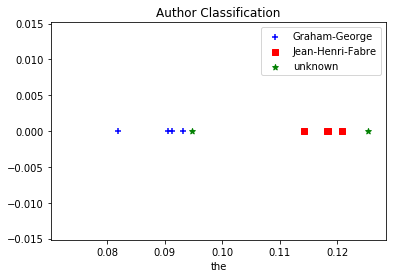

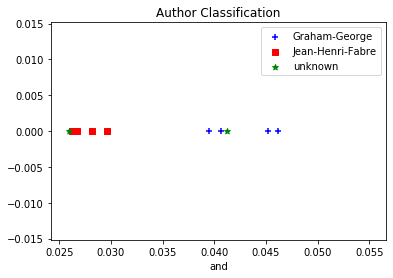

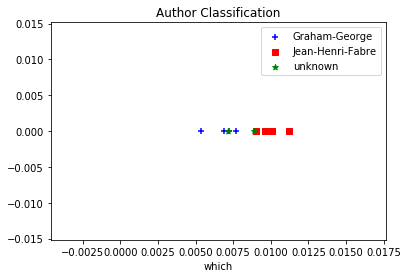

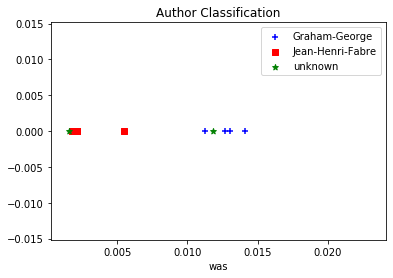

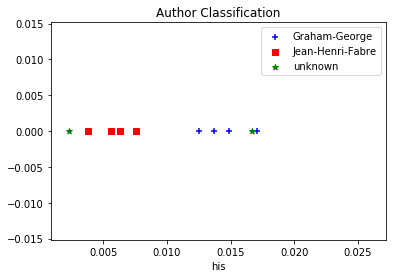

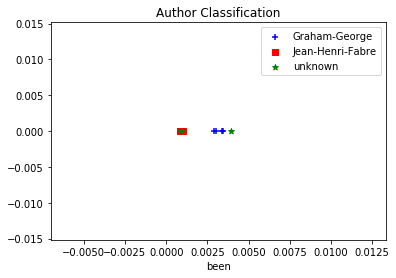

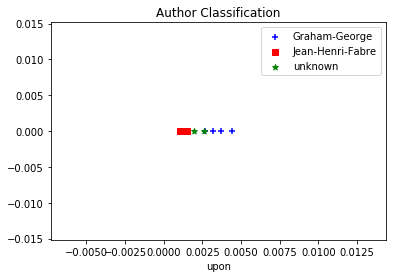

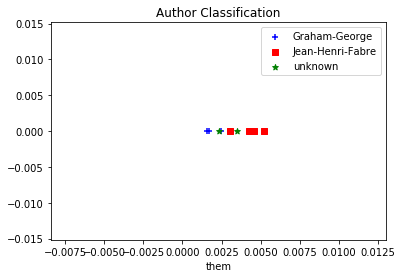

[None, None, None, None, None, None, None, None]

In [9]:
def plot_word(df,word):
    plt.scatter(df.loc["Graham-George-01":"Graham-George-04",word],4*[0],c="b",marker='+',label="Graham-George")
    plt.scatter(df.loc["Jean-Henri-Fabre-01":"Jean-Henri-Fabre-04",word],4*[0],c="r",marker=',',label="Jean-Henri-Fabre")
    plt.scatter(df.loc["unknown-01":"unknown-02",word],2*[0],c="green",marker='*',label="unknown")
    plt.title("Author Classification")
    plt.legend(loc='best')
    plt.xlabel(word)
    plt.show()
[plot_word(dfSingle,w) for w in ['the','and','which','was','his','been','upon','them']] 

### 2D plotting with label,color,title,marker and legend for two different words

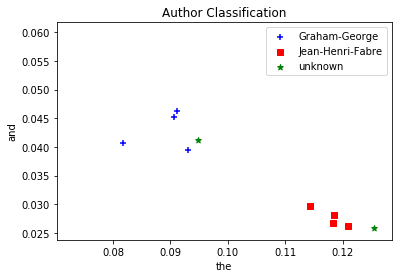

In [10]:
def plot_2dword(df,word,word2):
    plt.scatter(df.loc["Graham-George-01":"Graham-George-04",word],df.loc["Graham-George-01":"Graham-George-04",word2],c="b",marker='+',label="Graham-George")
    plt.scatter(df.loc["Jean-Henri-Fabre-01":"Jean-Henri-Fabre-04",word],df.loc["Jean-Henri-Fabre-01":"Jean-Henri-Fabre-04",word2],c="r",marker=',',label='Jean-Henri-Fabre')
    plt.scatter(df.loc["unknown-01":"unknown-02",word],df.loc["unknown-01":"unknown-02",word2],c='g',marker='*',label='unknown')
    plt.legend(loc='best')
    plt.title("Author Classification")
    plt.xlabel("the")
    plt.ylabel("and")
    plt.show()
plot_2dword(dfSingle,'the','and')

## KNN k=3

In [11]:
graham=[dfSingle.loc[f"Graham-George-0{x}",['the','and']] for x in range(1,5)]
jean=[dfSingle.loc[f"Jean-Henri-Fabre-0{x}",['the','and']] for x in range(1,5)]
unknown=[dfSingle.loc[f"unknown-0{x}",['the','and']] for x in range(1,3)]

## Identifying unknown 1

In [12]:
import numpy as np

In [13]:
def knn2d(x,y):
    return np.sqrt(abs(y['the']-x['the'])+abs(y['and']-x['and']))

In [14]:
distance=[['Graham-George',knn2d(graham[x],unknown[0])] for x in range(0,4)]
distance=distance+[['jean-henri-fabre',knn2d(jean[x],unknown[0])] for x in range(0,4)]
count={}
for x in sorted(distance,key=lambda x:x[1])[:3]:
    if x[0] not in count:
        count[x[0]]=0
    count[x[0]]+=1


In [15]:
author=max(count.items(),key=lambda x:x[1])
print(f"The knn analysis for unknown 1 name is {author[0]} with vote {author[1]}")

The knn analysis for unknown 1 name is Graham-George with vote 3


## Identifying unknown 2

In [16]:
distance=[['Graham-George',knn2d(graham[x],unknown[1])] for x in range(0,4)]
distance=distance+[['jean-henri',knn2d(jean[x],unknown[1])] for x in range(0,4)]
count={}
for x in sorted(distance,key=lambda x:x[1])[:3]:
    if x[0] not in count:
        count[x[0]]=0
    count[x[0]]+=1


In [17]:
author=max(count.items(),key=lambda x:x[1])
print(f"The knn analysis for unknown 2 name is {author[0]} with vote {author[1]}")

The knn analysis for unknown 2 name is jean-henri with vote 3


## Using KNN algorithm , it was possible to classify the authors . Unknown 1 is Graham-george and unknown 2 is Jean-henri-Fabre
### At first , distance calulation is done based on the distance euclean formula , then the democratic vote is taken . out of the vote unknown 1 comes out to be Graham-George and unknown 2 to be Jean-henri-Fabri 